In [1]:
##plot
from IPython.display import clear_output, display
import matplotlib.pylab as plt
import seaborn as sns; sns.set()
from matplotlib import colors
from itertools import cycle

#chem
import salty
import gains as genetic
from rdkit import Chem
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit import DataStructs
from rdkit.Chem import Draw
from rdkit.ML.Descriptors.MoleculeDescriptors import\
    MolecularDescriptorCalculator as calculator
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns; sns.set()
%matplotlib inline

import keras
from keras import objectives
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Input, Multiply, Add
from keras.optimizers import Adam, Nadam
import salty
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from random import shuffle
import pandas as pd
import random

#Keras build
from keras import backend as K
from keras.objectives import binary_crossentropy #objs or losses
from keras.models import Model
from keras.layers import Input, Dense, Lambda, Layer
from keras.layers.core import Dense, Activation, Flatten, RepeatVector
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import GRU
from keras.layers.convolutional import Convolution1D

#cation data
cations = pd.read_csv('../data/cations.csv')
cations = cations['smiles_string']
salts = pd.read_csv('../data/salts.csv')
salts = salts['smiles_string']
categories = pd.read_csv('../data/categories.csv')
categories = categories['category']
coldic = pd.read_csv('../data/coldic.csv')
coldic = coldic.to_dict(orient='records')[0]
salt_coldic = pd.read_csv('../data/salt_coldic.csv')
salt_coldic = salt_coldic.to_dict(orient='records')[0]
salt_categories = pd.read_csv('../data/salt_categories.csv')
salt_categories = salt_categories['category']
density_coldic = pd.read_csv('../data/density_coldic.csv')
density_coldic = density_coldic.to_dict(orient='records')[0]
density_categories = pd.read_csv('../data/density_categories.csv')
density_categories = density_categories['category']

#supporting functions
import sys
sys.path.insert(0, '../')
from scripts import *

#training array info
smile_max_length = 105
import json
f = open("../data/salt_char_to_index.json","r")
char_to_index = json.loads(f.read())
char_set = set(char_to_index.keys())
char_list = list(char_to_index.keys())
chars_in_dict = len(char_list)

/home/wesleybeckner/anaconda3/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
ls ../models/history_latent*

../models/history_latent_cpt_50.json
../models/history_latent_density_50.json
../models/history_latent_thermal_conductivity_25.json
../models/history_latent_thermal_conductivity_50.json
../models/history_latent_viscosity_50.json


In [3]:
import os
histories = []
for root, dirs, files in os.walk("../models/"):  
    for filename in files:
        if 'history_latent' in filename:
                histories.append(filename)

In [4]:

from matplotlib import colors
from itertools import cycle

def my_colors():
    """
    return a tableau colors iterable
    """
    tab = cycle(colors.TABLEAU_COLORS)
    return tab

In [5]:
hist.keys()

NameError: name 'hist' is not defined

In [8]:
properties = ['thermal_conductivity', 'cpt', 'density', 'viscosity']
gen3vae = TwoMoleculeVAE()
gen3vae.create(char_set, char_set, qspr=True, 
                   weights_file='../models/gen3_2mol_1mil_GDB17_mix_pure_5.h5',
                   qspr_outputs=1)

In [6]:
from matplotlib import cm

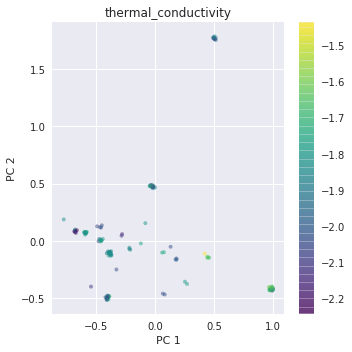

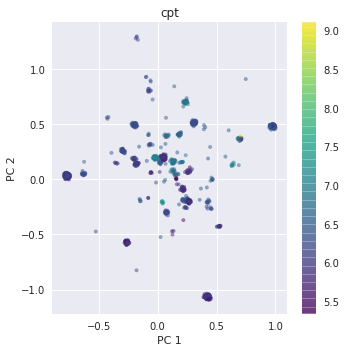

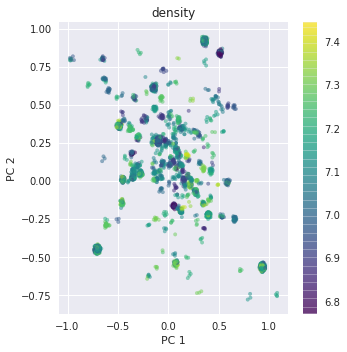

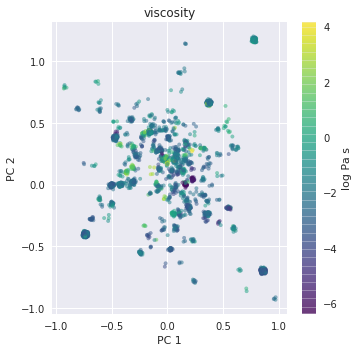

In [18]:
for prop in properties:
    gen3vae.autoencoder.name = prop
    x_train_cat = np.load('../data/{}_x_train_cat.npy'.format(prop))
    x_train_ani = np.load('../data/{}_x_train_ani.npy'.format(prop))
    x_test_cat = np.load('../data/{}_x_test_cat.npy'.format(prop))
    x_test_ani = np.load('../data/{}_x_test_ani.npy'.format(prop))
    y_train = np.load('../data/{}_y_train.npy'.format(prop))
    y_test = np.load('../data/{}_y_test.npy'.format(prop))
    
    z = gen3vae.cation_encoder.predict(np.concatenate([x_train_cat,x_test_cat]))
    z = np.array(z)
    pca = PCA(n_components=2)
    pcs = pca.fit_transform(z)
    fig, axs = plt.subplots(1,1, figsize=(5,5))
    scat = axs.scatter(pcs[:,0], 
                        pcs[:,1],
                 marker='.',
                    c=(np.concatenate([y_train,y_test])), alpha=0.5, cmap='viridis')
    axs.set_title(prop)
    axs.set_ylabel('PC 2')
    axs.set_xlabel('PC 1')
    bar = plt.colorbar(scat)
    plt.tight_layout()

    if prop == 'viscosity':
        bar.set_label('log Pa s')
        fig.savefig('assets/gen3vae_latent_{}.svg'.format(prop),dpi=300)
    fig.savefig('../data/latent_arrays/gen3vae_latent_{}.svg'.format(prop),dpi=300)

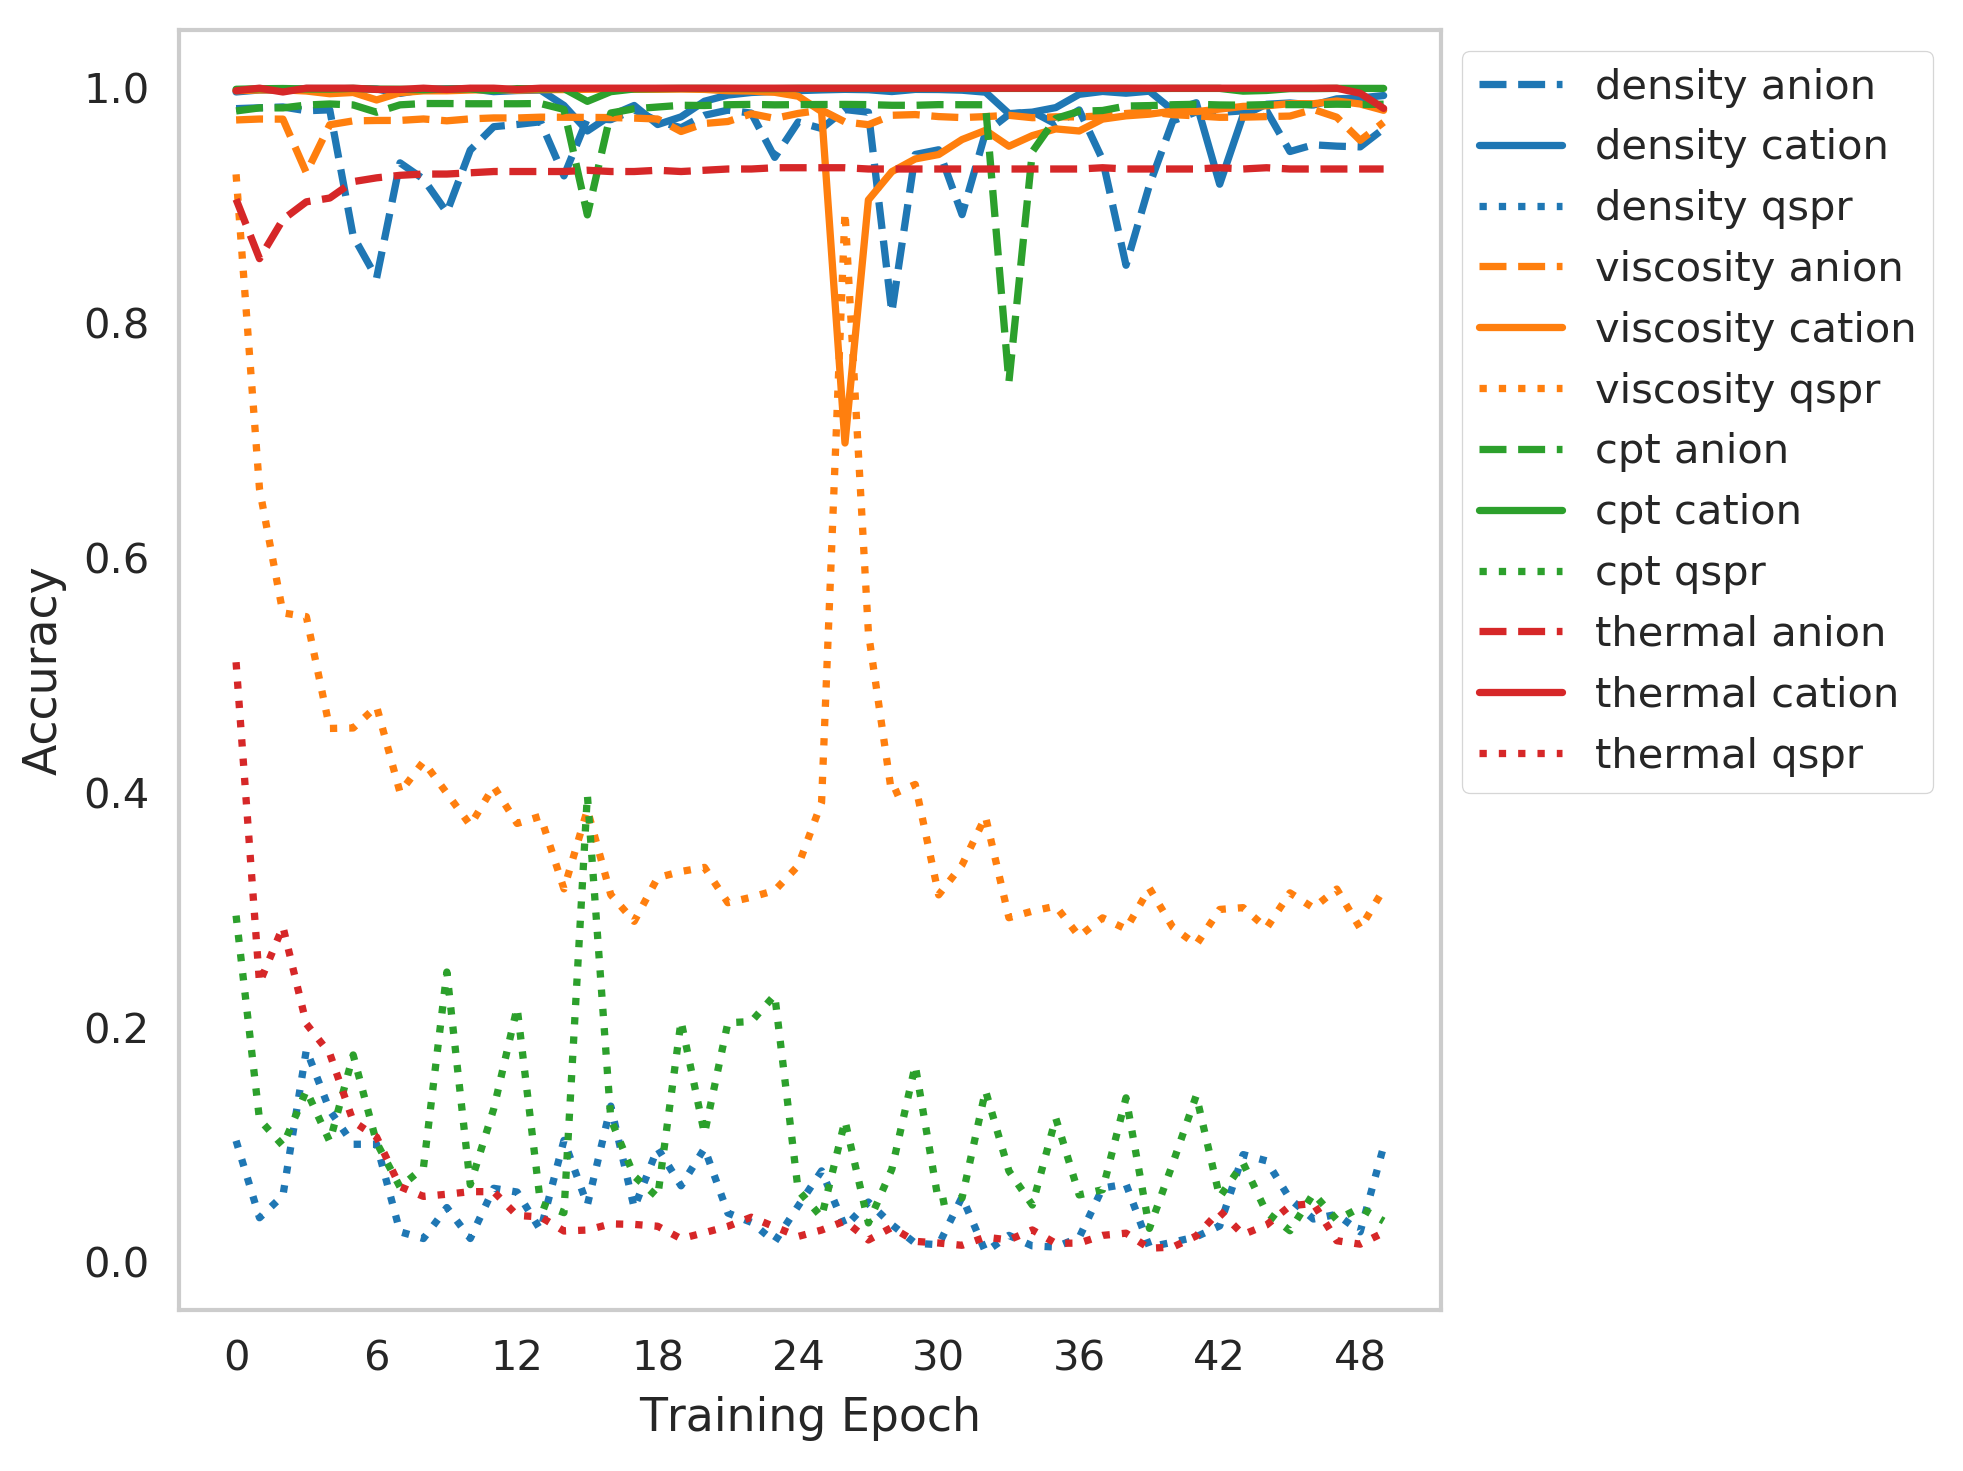

In [40]:
from matplotlib.ticker import MaxNLocator  ## Import MaxNLocator
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(1, figsize=(5,5), dpi=300)
    tab = my_colors()
    for i in range(4):
        col=next(tab)
        with open('../models/{}'.format(histories[i]), 'r') as f:
            hist = json.load(f)
        y1 = hist['val_anion_decoded_mean_acc']
        y2 = hist['val_cation_decoded_mean_acc']
        y3 = hist['val_qspr_mean_squared_error']
        
        ax.plot(np.arange(0,len(y1),1), y1, ls='--', label="{} anion".format(histories[i].split('_')[2]), c=col)
        ax.plot(np.arange(0,len(y2),1), y2, ls='-', label="{} cation".format(histories[i].split('_')[2]), c=col)
        ax.plot(np.arange(0,len(y3),1), y3, ls=':', label="{} qspr".format(histories[i].split('_')[2]), c=col)

        ax.set_ylabel('Accuracy')
        ax.set_xlabel('Training Epoch')
        
        ax.legend(bbox_to_anchor = [1,1], frameon=True)
#     ax.plot([10,10],[0.6,1.1], ls=':', c='tab:grey')
#     ax.plot([15,15],[0.6,1.1], ls=':', c='tab:grey')
    x_ax = ax.axes.get_xaxis()  ## Get X axis
    x_ax.set_major_locator(MaxNLocator(integer=True))  ## Set major locators to integer values
    fig.tight_layout()
    plt.grid()


In [43]:
z.shape

(1565, 292)

In [44]:
y_train.shape

(2949,)

/home/wesleybeckner/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


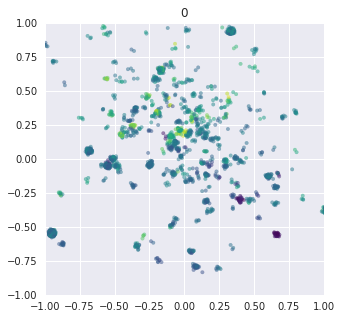

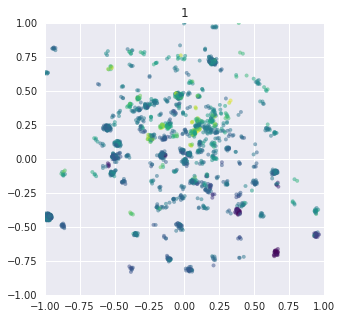

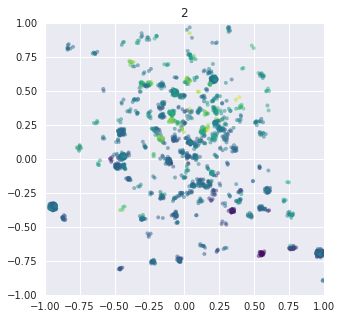

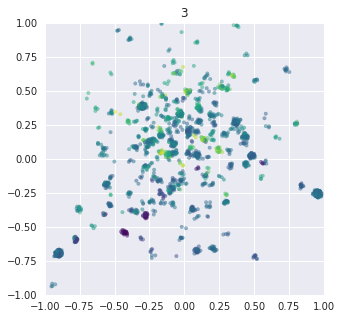

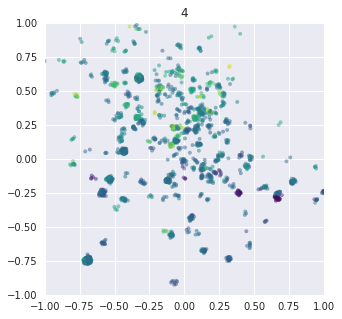

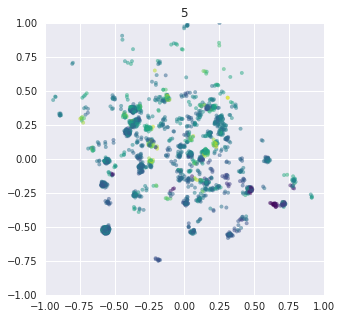

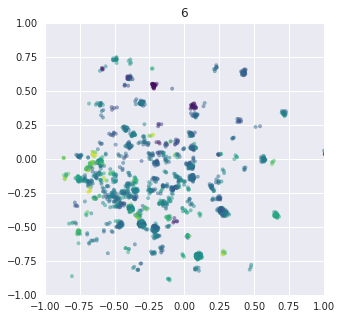

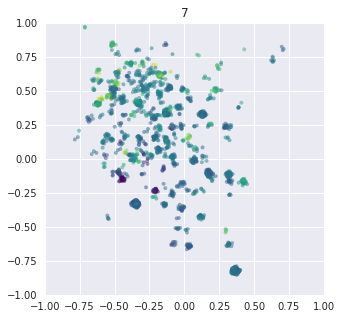

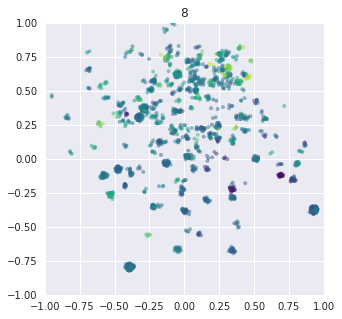

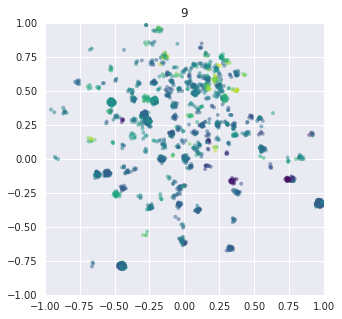

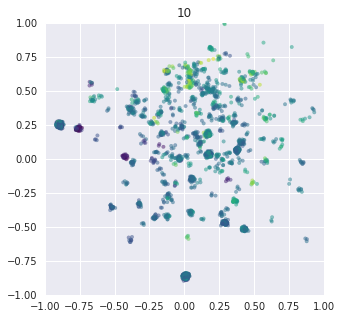

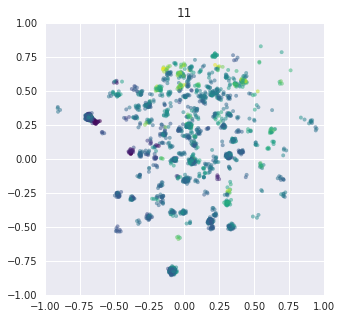

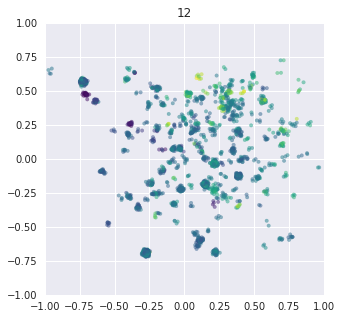

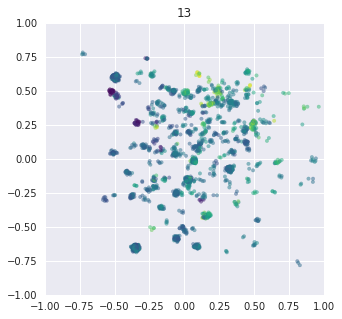

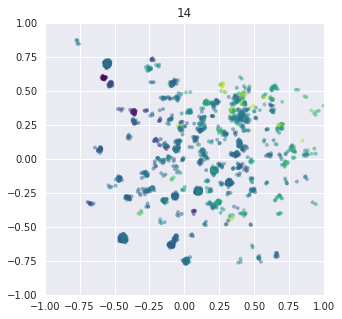

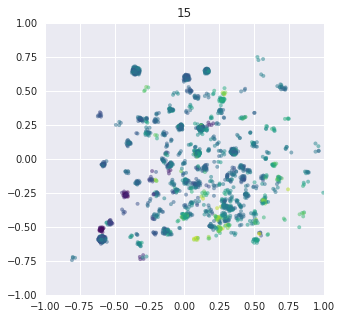

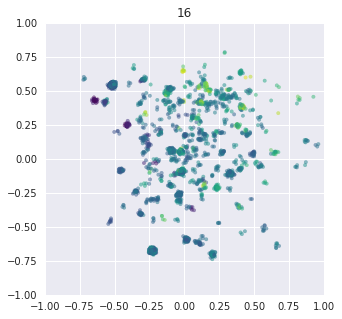

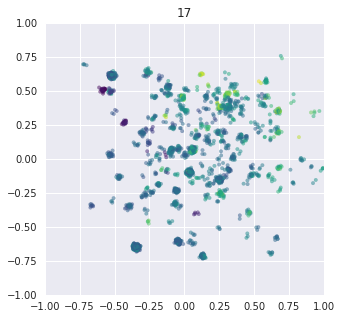

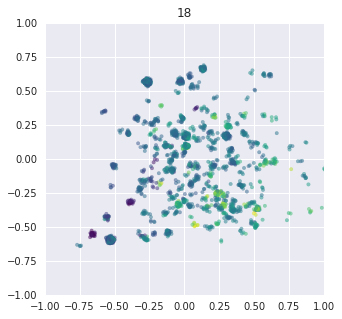

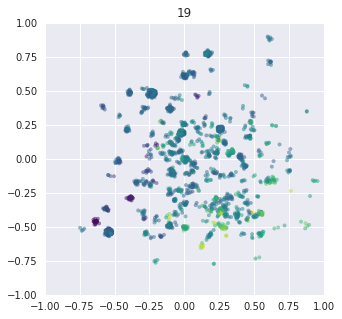

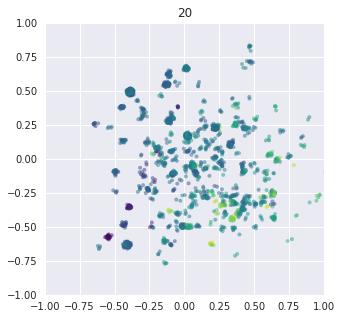

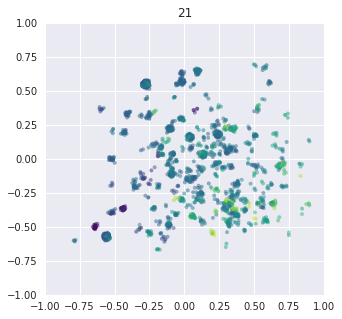

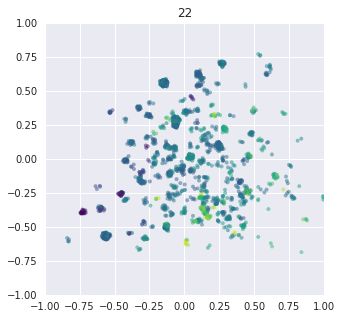

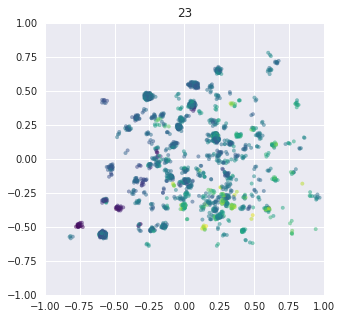

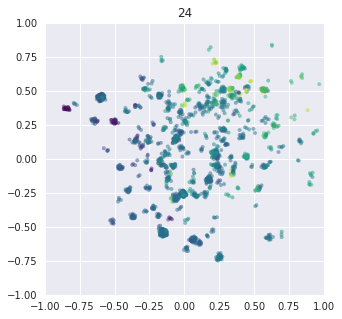

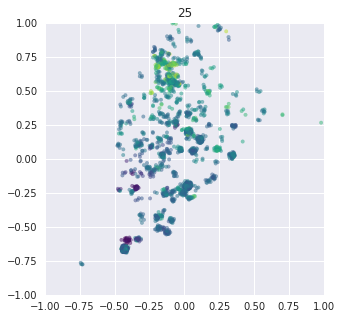

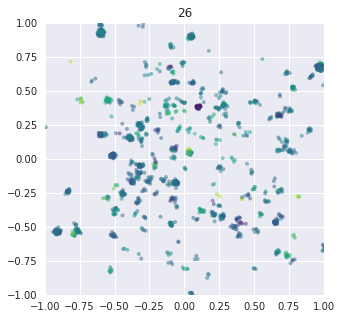

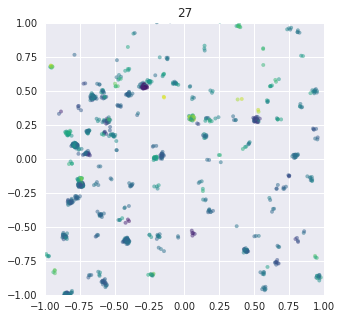

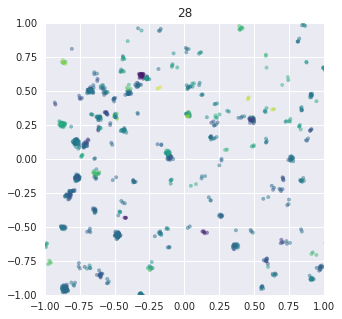

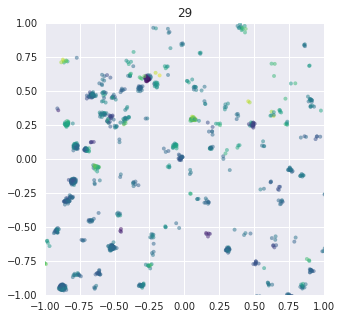

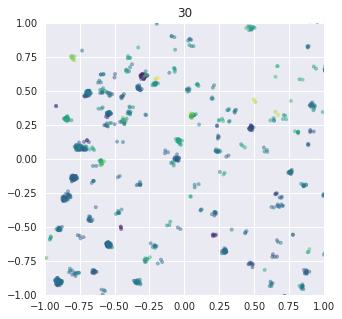

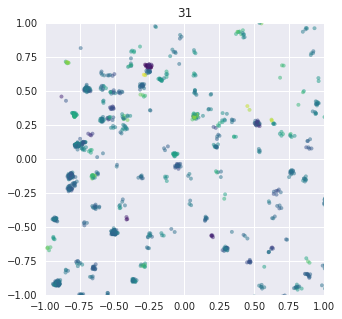

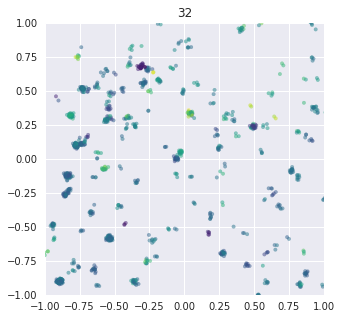

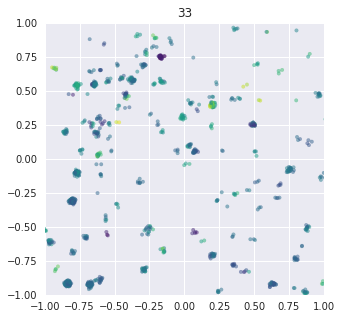

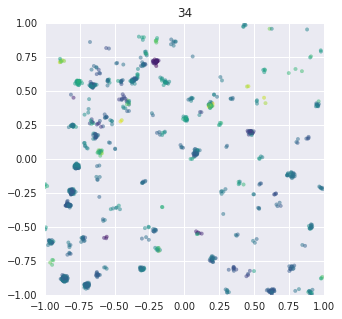

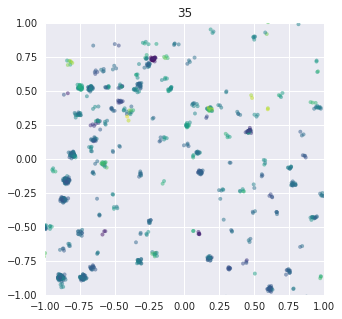

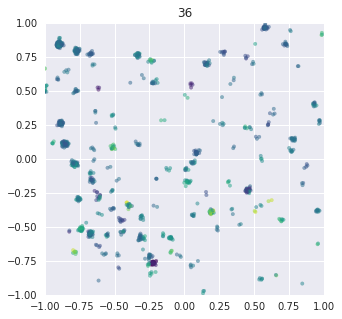

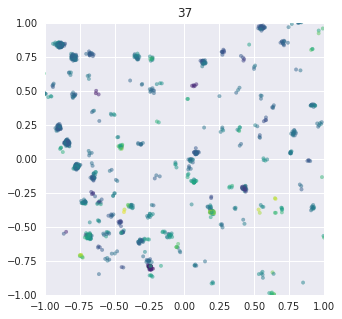

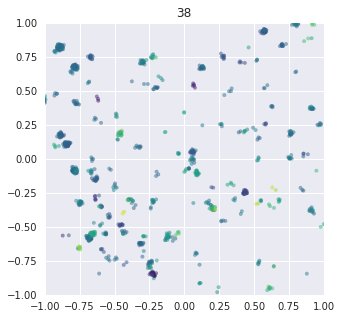

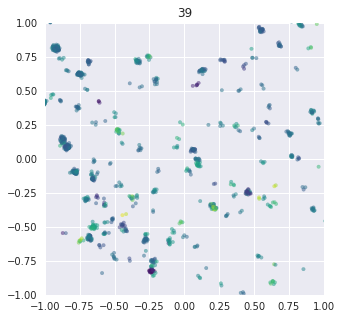

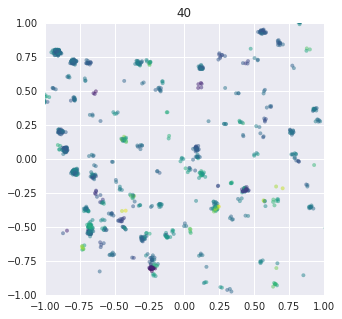

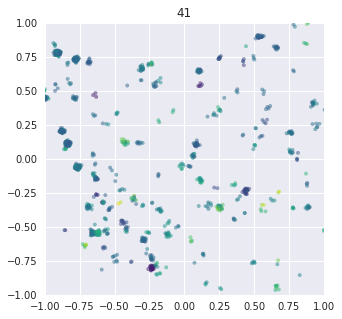

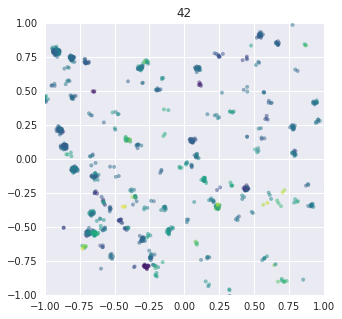

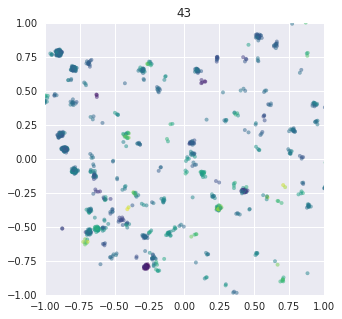

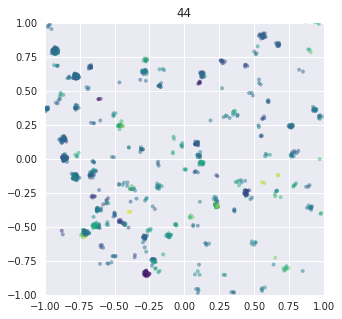

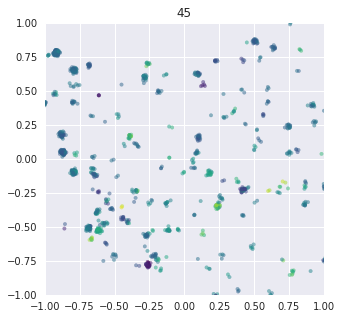

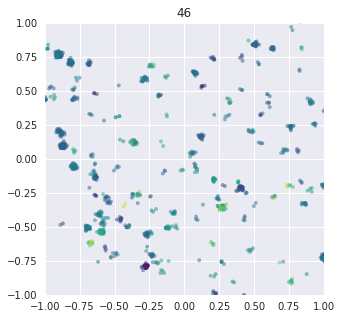

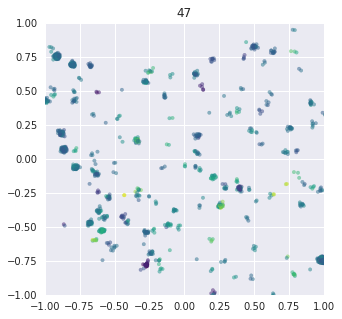

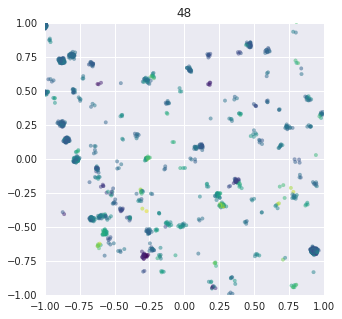

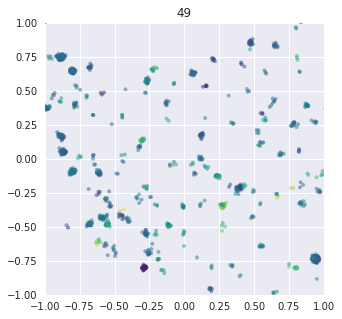

In [95]:
prop= 'viscosity'

for epoch in range(50):
    z = np.load('../data/latent_arrays/{}_{}.npy'.format(prop, epoch))
    y_train = np.load('../data/{}_y_train.npy'.format(prop))
    pca = PCA(n_components=4)
    pcs = pca.fit_transform(z)
    fig, axs = plt.subplots(1,1, figsize=(5,5), sharex=True, sharey=True)
    axs.scatter(pcs[:,0], 
                        pcs[:,1],
                 marker='.',
                    c=(y_train), alpha=0.5, cmap='viridis')
    axs.set_ylim(-1,1)
    axs.set_xlim(-1,1)
    axs.set_title(epoch)
#     fig.savefig('../data/latent_arrays/{}_{}.png'.format(prop,epoch), dpi=300)